In [1]:
from brian2 import *
import neuraltda.topology3 as tp3
import numpy as np

WARNING    /home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
 [py.warnings]


In [2]:
eqs = '''
dv/dt  = (ge+gi-(v+49*mV))/(20*ms) : volt
dge/dt = -ge/(5*ms)                : volt
dgi/dt = -gi/(10*ms)               : volt
'''
P = NeuronGroup(4000, eqs, threshold='v>-50*mV', reset='v=-60*mV')
P.v = -60*mV
Pe = P[:3200]
Pi = P[3200:]
Ce = Synapses(Pe, P, on_pre='ge+=1.62*mV')
Ce.connect(p=0.02)
Ci = Synapses(Pi, P, on_pre='gi-=9*mV')
Ci.connect(p=0.02)
M = SpikeMonitor(P)

INFO       No numerical integration method specified for group 'neurongroup', using method 'exact' (took 0.35s). [brian2.stateupdaters.base.method_choice]


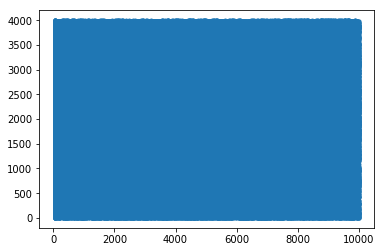

In [3]:
run(10*second)
plot(M.t/ms, M.i, '.')
show()

In [4]:
sp_times = np.array(M.t / ms)
sp_inds = np.array(M.i)

In [5]:
late_spikes = sp_times > 500
sp_times = sp_times[late_spikes]
sp_inds = sp_inds[late_spikes]

In [6]:
n_sel = sp_inds < 250
sp_times = (sp_times[n_sel]*10).astype(int)
sp_inds = sp_inds[n_sel]
spikes = np.vstack((sp_times, sp_inds)).T

In [18]:
s_start = 5000
s_end = 100000
win_len = 40 #1 millisecond
fs = 10000
thresh = 4.0
maxdim = 5
t, betti_curves = tp3.get_betti_curves(spikes, s_start, s_end, win_len, fs, thresh, maxdim)

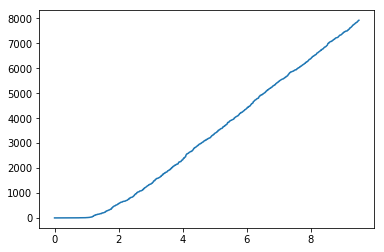

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(t, betti_curves[2])